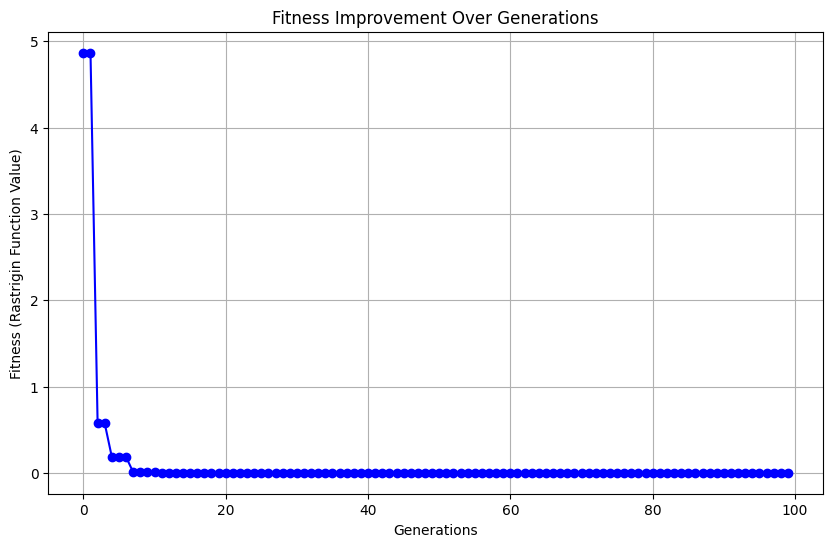

Best solution found: [-0.00161827 -0.0020904 ]
Rastrigin function value at best solution: 0.0013864556181673038


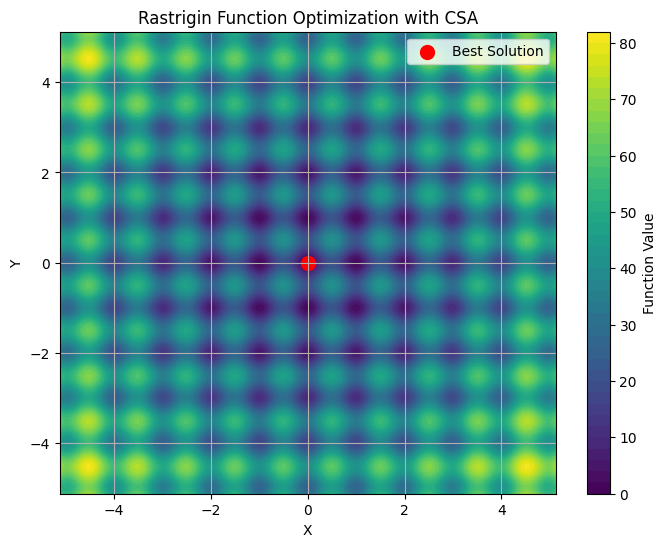

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rastrigin function
def rastrigin(X):
    n = len(X)
    return 10 * n + np.sum(X**2 - 10 * np.cos(2 * np.pi * X))

# Generate the initial population of potential solutions
def generate_initial_population(pop_size, solution_size):
    return np.random.uniform(-5.12, 5.12, size=(pop_size, solution_size))  # Initialize within the search space of Rastrigin

# Evaluate the fitness of each individual in the population (lower is better)
def evaluate_population(population):
    return np.array([rastrigin(individual) for individual in population])

# Select the best candidates from the population based on their fitness
def select_best_candidates(population, fitness, num_candidates):
    indices = np.argsort(fitness)
    return population[indices[:num_candidates]], fitness[indices[:num_candidates]]

# Clone the best candidates multiple times
def clone_candidates(candidates, num_clones):
    return np.repeat(candidates, num_clones, axis=0)

# Introduce random mutations to the cloned candidates to explore new solutions
def mutate_clones(clones, mutation_rate):
    mutations = np.random.rand(*clones.shape) < mutation_rate
    clones[mutations] += np.random.uniform(-1, 1, np.sum(mutations))  # Mutate by adding a random value
    return clones

# Main function implementing the Clonal Selection Algorithm
def clonal_selection_algorithm(solution_size=2, pop_size=100, num_candidates=10, num_clones=10, mutation_rate=0.05, generations=100):
    population = generate_initial_population(pop_size, solution_size)

    best_fitness_per_generation = []  # Track the best fitness in each generation

    for generation in range(generations):
        fitness = evaluate_population(population)
        candidates, candidate_fitness = select_best_candidates(population, fitness, num_candidates)
        clones = clone_candidates(candidates, num_clones)
        mutated_clones = mutate_clones(clones, mutation_rate)
        clone_fitness = evaluate_population(mutated_clones)

        # Replace the worst individuals in the population with the new mutated clones
        population[:len(mutated_clones)] = mutated_clones
        fitness[:len(clone_fitness)] = clone_fitness

        # Track the best fitness of this generation
        best_fitness = np.min(fitness)
        best_fitness_per_generation.append(best_fitness)

        # Stop early if we've found a solution close to the global minimum
        if best_fitness < 1e-6:
            print(f"Optimal solution found in {generation + 1} generations.")
            break

    # Plot the fitness improvement over generations
    plt.figure(figsize=(10, 6))
    plt.plot(best_fitness_per_generation, marker='o', color='blue', label='Best Fitness per Generation')
    plt.xlabel('Generations')
    plt.ylabel('Fitness (Rastrigin Function Value)')
    plt.title('Fitness Improvement Over Generations')
    plt.grid(True)
    plt.show()

    # Return the best solution found (the one with the lowest fitness score)
    best_solution = population[np.argmin(fitness)]
    return best_solution

# Example Usage
best_solution = clonal_selection_algorithm(solution_size=2)  # Using 2D Rastrigin function
print("Best solution found:", best_solution)
print("Rastrigin function value at best solution:", rastrigin(best_solution))

# Plot the surface of the Rastrigin function with the best solution found
x = np.linspace(-5.12, 5.12, 200)
y = np.linspace(-5.12, 5.12, 200)
X, Y = np.meshgrid(x, y)
Z = 10 * 2 + (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y))

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Function Value')
plt.scatter(best_solution[0], best_solution[1], c='red', s=100, label='Best Solution')
plt.title('Rastrigin Function Optimization with CSA')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()